In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
from numpy import where
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import snips as snp
from mlxtend.plotting import plot_learning_curves
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.optimizers import SGD
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [3]:
df = pd.read_csv("C:/Users/Chandu/Downloads/Full_Data_Mean_Result.csv",index_col=None)
print(df.shape)

(19988, 29)


# Data Exploration

In [6]:
print(df.columns)

Index(['Date', 'pH', 'Temp', 'DO', 'Salinity', 'Conductivity', 'Ammonia',
       'Q pH', 'Q Temp', 'Q DO', 'Q Salinity', 'Q Conductivity', 'Q Ammonia',
       'W pH', 'W Temp', 'W DO', 'W Salinity', 'W Conductivity', 'W Ammonia',
       'Q pH * W pH', 'Q Temp * W Temp', 'Q DO * W DO',
       'Q Salinity * W Salinity', 'Q Conductivity * W Conductivity',
       'Q Ammonia * W Ammonia', 'Wn', 'Q * W', 'WQI', 'Result'],
      dtype='object')


In [7]:
df.head()

,Date,pH,Temp,DO,Salinity,Conductivity,Ammonia,Q pH,Q Temp,Q DO,...,Q pH * W pH,Q Temp * W Temp,Q DO * W DO,Q Salinity * W Salinity,Q Conductivity * W Conductivity,Q Ammonia * W Ammonia,Wn,Q * W,WQI,Result
0,10/17/1974,7.900000,22.857426,15.832946,14.863006,2129.12337,0.663618,180.000000,114.287132,-14.336577,...,1.407915,0.335222,-0.140171,0.071176,0.019516,1081.385888,1,1083.079546,1083.079546,5
1,10/17/1974,8.081018,16.000000,15.832946,14.863006,2129.12337,0.663618,216.203608,80.000000,-14.336577,...,1.691090,0.234652,-0.140171,0.071176,0.019516,1081.385888,1,1083.262152,1083.262152,5
2,10/18/1974,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,216.203608,114.287132,-14.336577,...,1.691090,0.335222,-0.140171,0.071176,0.019516,1081.385888,1,1083.362721,1083.362721,5
3,10/19/1974,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,216.203608,114.287132,-14.336577,...,1.691090,0.335222,-0.140171,0.071176,0.019516,1081.385888,1,1083.362721,1083.362721,5
4,10/20/1974,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,216.203608,114.287132,-14.336577,...,1.691090,0.335222,-0.140171,0.071176,0.019516,1081.385888,1,1083.362721,1083.362721,5


In [4]:
#Converting the "Date" field to datetime format
df['Date'] = pd.to_datetime(df.Date)

# Neural Networks

In [5]:
wf = df[['pH','Temp','DO','Salinity','Conductivity', 'Ammonia', 'Result']]

In [6]:
wf.head()

,pH,Temp,DO,Salinity,Conductivity,Ammonia,Result
0,7.900000,22.857426,15.832946,14.863006,2129.12337,0.663618,5
1,8.081018,16.000000,15.832946,14.863006,2129.12337,0.663618,5
2,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,5
3,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,5
4,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,5


In [7]:
y = wf['Result']
X = wf.drop(['Result'],axis=1, inplace=True)

C:\Users\Chandu\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [8]:
#Splitting of data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wf, y, test_size=0.33, random_state=45)

X_train = X_train.as_matrix()
X_test = X_test.as_matrix()

y_train = y_train.as_matrix()
y_test = y_test.as_matrix()

C:\Users\Chandu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\Chandu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Chandu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Chandu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [9]:
model = Sequential()
model.add(Dense(20, input_dim=6, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, input_dim=6, activation='tanh'))
model.add(Dense(1))
opt = SGD(lr=0.01, momentum=0.9)

In [10]:
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

In [11]:
# Using fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)


Train on 13391 samples, validate on 6597 samples
Epoch 1/10
13391/13391 [==============================] - 1s 84us/step - loss: 0.4711 - accuracy: 0.9117 - val_loss: 0.0997 - val_accuracy: 0.9889
Epoch 2/10
13391/13391 [==============================] - 1s 99us/step - loss: 0.0843 - accuracy: 0.9901 - val_loss: 0.0935 - val_accuracy: 0.9889
Epoch 3/10
13391/13391 [==============================] - 1s 87us/step - loss: 0.0859 - accuracy: 0.9901 - val_loss: 0.0923 - val_accuracy: 0.9889
Epoch 4/10
13391/13391 [==============================] - 1s 93us/step - loss: 0.0843 - accuracy: 0.9901 - val_loss: 0.0933 - val_accuracy: 0.9889
Epoch 5/10
13391/13391 [==============================] - 1s 87us/step - loss: 0.0856 - accuracy: 0.9901 - val_loss: 0.0971 - val_accuracy: 0.9889
Epoch 6/10
13391/13391 [==============================] - 1s 104us/step - loss: 0.0848 - accuracy: 0.9901 - val_loss: 0.0929 - val_accuracy: 0.9889
Epoch 7/10
13391/13391 [==============================] - 1s 95us/s

In [12]:
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print(train_mse, test_mse)

[0.08150561188240395, 0.9900679588317871] [0.09134331179712656, 0.988934338092804]


In [13]:
#Train Accuracy
train_acc = model.evaluate(X_train, y_train)
print(train_acc)

13391/13391 [==============================] - 0s 29us/step
[0.08150561188240395, 0.9900679588317871]


In [14]:
#Test Accuracy
test_acc = model.evaluate(X_test, y_test, verbose=0)
print(test_acc)

[0.09134331179712656, 0.988934338092804]


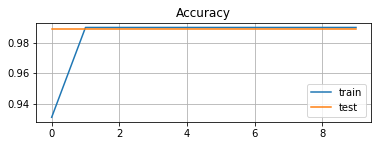

In [25]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy during training')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.grid(True)
pyplot.show()

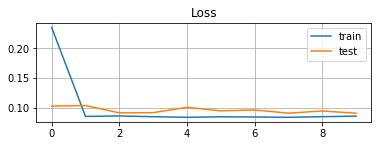

In [24]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss during training')
pyplot.grid(True)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# Multi-layer Perceptron (MLP)

In [15]:
data = df[['pH','Temp','DO','Salinity','Conductivity', 'Ammonia', 'WQI']]

In [16]:
data.head()

,pH,Temp,DO,Salinity,Conductivity,Ammonia,WQI
0,7.900000,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.079546
1,8.081018,16.000000,15.832946,14.863006,2129.12337,0.663618,1083.262152
2,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.362721
3,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.362721
4,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,1083.362721


In [17]:
#Label encoding all parameters
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['pH'] = le.fit_transform(data['pH'])
data['Temp'] = le.fit_transform(data['Temp'])
data['Conductivity'] = le.fit_transform(data['Conductivity'])
data['Salinity'] = le.fit_transform(data['Salinity'])
data['DO'] = le.fit_transform(data['DO'])
data['Ammonia'] = le.fit_transform(data['Ammonia'])
data['WQI'] = le.fit_transform(data['WQI'])

C:\Users\Chandu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Chandu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Chandu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [18]:
#Feature scaling of all input parameters
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[['pH','Temp','DO','Salinity','Conductivity', 'Ammonia']] = sc.fit_transform(data[['pH','Temp','DO','Salinity','Conductivity', 'Ammonia']])

C:\Users\Chandu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Chandu\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [19]:
#Splitting the dataset into  training and validation sets
training_set, validation_set = train_test_split(data, test_size = 0.33, random_state = 21)

In [20]:
#classifying the predictors and target variables as X and Y
X_train = training_set.iloc[:,0:-1].values
Y_train = training_set.iloc[:,-1].values
X_val = validation_set.iloc[:,0:-1].values
y_val = validation_set.iloc[:,-1].values

In [21]:
#Using Confusion matix for accuracy calculation
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements * 100

In [22]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

In [23]:
#Fitting the training data to the network
classifier.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [24]:
#Predicting y for X_val
y_pred_train = classifier.predict(X_train)
y_pred = classifier.predict(X_val)

In [25]:
#Comparing the predictions against the actual observations in y_val
cm1 = confusion_matrix(y_pred_train, Y_train)
accu1 = accuracy(cm1)
cm = confusion_matrix(y_pred, y_val)
accu = accuracy(cm)
#Printing the accuracy
print("Accuracy of MLPClassifier for train : ", accu1 )
print("Accuracy of MLPClassifier for test : ", accu )

Accuracy of MLPClassifier for train :  93.45829288327981
Accuracy of MLPClassifier for test :  91.7841443080188


In [19]:
np.size(classifier.coefs_[0])
len(classifier.intercepts_[0])

150

Text(0, 0.5, 'Neuron in output layer')

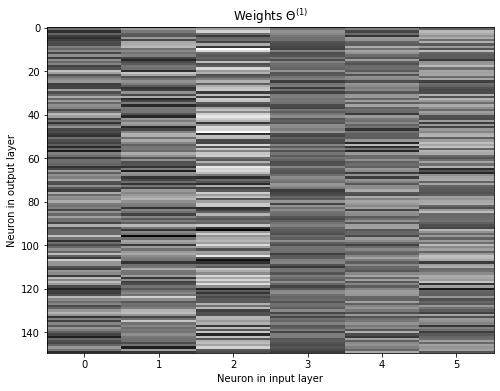

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.imshow(np.transpose(classifier.coefs_[0]), cmap=plt.get_cmap("gray"), aspect="auto")
plt.title('Weights $\Theta^{(1)}$')
plt.xlabel('Neuron in input layer')
plt.ylabel('Neuron in output layer')

Text(0, 0.5, 'loss function')

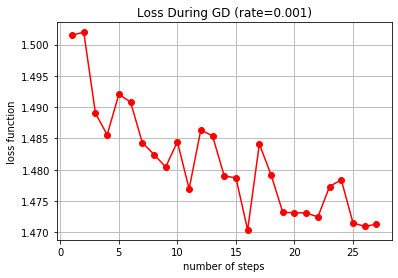

In [33]:
# plot loss during training
plt.plot(classifier.loss_curve_, 'ro-')
plt.title('Loss During GD (rate=0.001)')
plt.grid(True)
plt.xlabel('number of steps')
plt.ylabel('loss function')

In [31]:
classifier.learning_rate_init = 1
classifier.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100, 50), learning_rate='constant',
              learning_rate_init=1, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Text(0, 0.5, 'loss function')

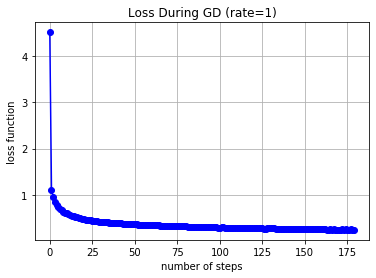

In [30]:
# plot loss during training
plt.plot(classifier.loss_curve_, 'bo-')
plt.title('Loss During GD (rate=1)')
plt.grid(True)
plt.xlabel('number of steps')
plt.ylabel('loss function')

In [34]:
#Cross-Validation
from sklearn.model_selection import GridSearchCV
params = { 'hidden_layer_sizes' : [(100, 100, 100), (125, 125, 125)] }

gscv = GridSearchCV(classifier, params, verbose=1)

In [23]:
gscv.fit(X_train, Y_train)
print(gscv.best_params_) 

predicted_values = gscv.predict(X_val)
score = accuracy_score(y_val,predicted_values)
print(score)

C:\Users\Chandu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Chandu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 10.1min finished
C:\Users\Chandu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'hidden_layer_sizes': (100, 100, 100)}
0.9201152038805518


In [37]:
#Calculating the mean squared error
mean_square_error = mean_squared_error(y_val, y_pred)
print("Mean Square Error = ", mean_square_error)

Mean Square Error =  117.56798544793088


In [38]:
#Calculating the root mean squared error
root_mean_square_error = sqrt(mean_squared_error(y_val, y_pred))
print("Root Mean Square Error =", root_mean_square_error)

Root Mean Square Error = 10.842877175728354


In [39]:
#Calculating the mean absolute error
mae = mean_absolute_error(y_val, y_pred)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  0.6460512354100348


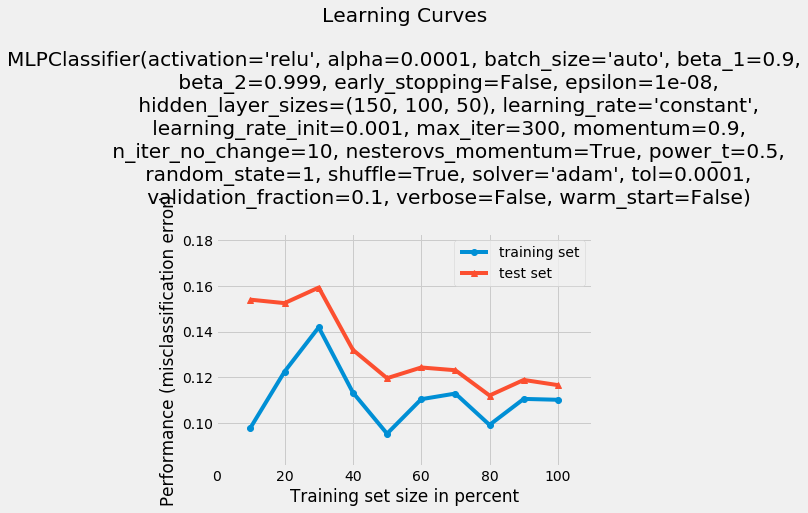

In [48]:
plot_learning_curves(X_train, Y_train, X_val, y_val, classifier)
plt.show()